<a href="https://colab.research.google.com/github/jabbathehern/Carbon_Timecourse/blob/main/2022_12_15_FeatureAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from matplotlib import pyplot as plt
import pandas as pd

In [33]:
!git clone https://github.com/jabbathehern/carbon_timecourse_csv

fatal: destination path 'carbon_timecourse_csv' already exists and is not an empty directory.


In [36]:
!ls carbon_timecourse_csv

CP13_carbon.csv  CP4_carbon.csv  CP9_carbon.csv
CP17_carbon.csv  CP7_carbon.csv


In [43]:
CP4_df = pd.read_csv(r'carbon_timecourse_csv/CP4_carbon.csv')
CP4_df.head()

,Time (mins),Lactate_rep1,Aspartic Acid_rep1,Threonine_rep1,Serine_rep1,Glutamine_rep1,Proline_rep1,Glycine_rep1,Alanine_rep1,Valine_rep1,...,Leucine_rep3,Tyrosine_rep3,Phenylalanine_rep3,Ornithine_rep3,Lysine_rep3,Histidine_rep3,Tryptophan_rep3,Arginine_rep3,Glucose_rep3,Cysteine_rep3
0,0.000000,0.0802,0.0720,0.0748,0.0777,0.3257,0.0814,0.1070,0.0940,0.0853,...,0.0841,0.1055,0.0769,0.0836,0.1220,0.0823,0.1570,0.1257,0.1014,0.0972
1,5.333333,0.0794,0.0694,0.0709,0.0786,0.3634,0.0879,0.1145,0.1027,0.0958,...,0.0802,0.1006,0.0802,0.0814,0.1222,0.0857,0.1607,0.1309,0.0988,0.1006
2,10.666667,0.0792,0.0704,0.0673,0.0790,0.3665,0.0871,0.1049,0.1015,0.0969,...,0.0800,0.1011,0.0792,0.0807,0.1249,0.0873,0.1590,0.1341,0.1004,0.1003
3,16.001667,0.0804,0.0732,0.0666,0.0829,0.3726,0.0901,0.1121,0.1069,0.0992,...,0.0784,0.1023,0.0816,0.0814,0.1270,0.0877,0.1612,0.1342,0.1026,0.1009
4,21.335000,0.0816,0.0764,0.0700,0.0822,0.3588,0.0865,0.1066,0.1021,0.0958,...,0.0757,0.1041,0.0767,0.0772,0.1244,0.0856,0.1586,0.1322,0.0979,0.0981


In [46]:
x_data = CP4_df['Time (mins)']
x_data

0         0.000000
1         5.333333
2        10.666667
3        16.001667
4        21.335000
          ...     
680    3627.000000
681    3632.333333
682    3637.668333
683    3643.001667
684    3648.335000
Name: Time (mins), Length: 685, dtype: float64

In [50]:
y_data_lactate = CP4_df.loc[:, ['Lactate_rep1','Lactate_rep2','Lactate_rep3']]
y_data_lactate

,Lactate_rep1,Lactate_rep2,Lactate_rep3
0,0.0802,0.0816,0.0743
1,0.0794,0.0807,0.0711
2,0.0792,0.0836,0.0710
3,0.0804,0.0820,0.0711
4,0.0816,0.0828,0.0717
...,...,...,...
680,0.1427,0.1262,0.1157
681,0.1426,0.1258,0.1151
682,0.1425,0.1245,0.1124
683,0.1423,0.1240,0.1104


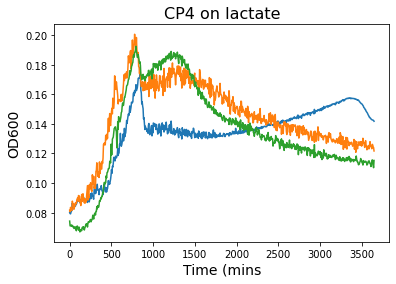

In [51]:
plt.plot(x_data,y_data_lactate)
plt.title('CP4 on lactate',fontsize = 16)
plt.xlabel('Time (mins', fontsize = 14)
plt.ylabel('OD600', fontsize = 14)
plt.show()

In [71]:
CP4_lactate_df = pd.DataFrame(y_data_lactate.mean(axis=1), columns = ['mean'])
CP4_lactate_df['std'] = y_data_lactate.std(axis=1)
CP4_lactate_df

,mean,std
0,0.078700,0.003874
1,0.077067,0.005208
2,0.077933,0.006395
3,0.077833,0.005886
4,0.078700,0.006092
...,...,...
680,0.128200,0.013611
681,0.127833,0.013862
682,0.126467,0.015146
683,0.125567,0.016008


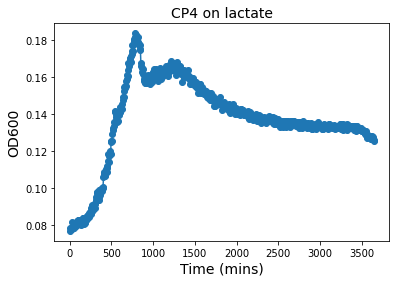

In [62]:
plt.errorbar(x_data, CP4_lactate_df['mean'], fmt = '-o', capsize = 5)
plt.title('CP4 on lactate', fontsize = 14)
plt.xlabel('Time (mins)', fontsize=14)
plt.ylabel('OD600', fontsize=14)
plt.savefig('CP4 Lactate.png', dpi = 200)
plt.show()

In [72]:
CP4_lactate_df['time'] = x_data
CP4_lactate_df

,mean,std,time
0,0.078700,0.003874,0.000000
1,0.077067,0.005208,5.333333
2,0.077933,0.006395,10.666667
3,0.077833,0.005886,16.001667
4,0.078700,0.006092,21.335000
...,...,...,...
680,0.128200,0.013611,3627.000000
681,0.127833,0.013862,3632.333333
682,0.126467,0.015146,3637.668333
683,0.125567,0.016008,3643.001667
